# Analizar el dataset de 

[kaggle](https://www.kaggle.com/datasets/cbhavik/music-taste-recommendation?resource=download) de datos de spotify

(Rercuerda que primero debes añadir el dataset antes de ejeutar el colab)

importamos las librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

descargamos el dataset

In [2]:
!wget https://raw.githubusercontent.com/sstoikov/piki-music-dataset/main/data/piki_dataset.csv

--2022-11-17 14:06:29--  https://raw.githubusercontent.com/sstoikov/piki-music-dataset/main/data/piki_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49926188 (48M) [text/plain]
Saving to: ‘piki_dataset.csv’

piki_dataset.csv    100%[===================>]  47.61M   244MB/s    in 0.2s    

2022-11-17 14:06:31 (244 MB/s) - ‘piki_dataset.csv’ saved [49926188/49926188]



leemos el dataset y lo imprimimos

In [3]:
data=pd.read_csv("piki_dataset.csv")

In [4]:
print(data)

         Unnamed: 0  liked  personalized  song_id  spotify_popularity  \
0                 0      0             1    32192                  87   
1                 1      0             1     6801                  45   
2                 2      0             1    31643                  62   
3                 3      0             1  1864239                  72   
4                 4      0             1    38804                  73   
...             ...    ...           ...      ...                 ...   
1017942     1017942      1             2  1915602                  63   
1017943     1017943      0             2  4118250                  56   
1017944     1017944      1             2  4161727                  78   
1017945     1017945      0             2  4111176                  68   
1017946     1017946      1             2  4100637                  80   

                   timestamp  user_id  
0        2019-06-21 01:04:23  3720277  
1        2019-06-21 01:04:33  3720277  
2  

Observamos el dataset para ver si tiene anomalias

In [5]:
data.describe()

,Unnamed: 0,liked,personalized,song_id,spotify_popularity,user_id
count,1.017947e+06,1.017947e+06,1.017947e+06,1.017947e+06,1.017947e+06,1.017947e+06
mean,5.089730e+05,4.652757e-01,9.434470e-01,2.451817e+06,5.481023e+01,3.734782e+06
std,2.938561e+05,6.049494e-01,4.034614e-01,2.270835e+06,2.069920e+01,1.479112e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.833898e+06
25%,2.544865e+05,0.000000e+00,1.000000e+00,6.427500e+04,4.300000e+01,3.731375e+06
50%,5.089730e+05,0.000000e+00,1.000000e+00,1.893882e+06,5.600000e+01,3.734746e+06
75%,7.634595e+05,1.000000e+00,1.000000e+00,4.304542e+06,7.000000e+01,3.738987e+06
max,1.017946e+06,2.000000e+00,2.000000e+00,8.120888e+06,1.000000e+02,3.741780e+06


**¿La popularidad de la canción tiene que ver con las fechas?** y ¿Una fecha hace que una canción sea más popular que si la es escuchada o lanzada en otro momento?

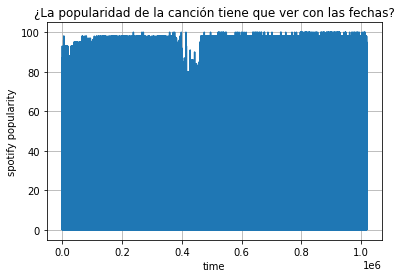

In [6]:
y=data["spotify_popularity"]
plt.plot(y)
plt.ylabel('spotify popularity')
plt.xlabel('time')
plt.title('¿La popularidad de la canción tiene que ver con las fechas?')
plt.grid()
plt.show()

podemos ver si una canción es popular con la cantidad de reproducciones, `spotify_popularity` sería el número de reproducciones en porcentaje, es difícil comparar fechas donde no se hace nada (vacaciones) para ver si en una fecha hay más gente desocupada escuchando música, es difícil porque los datos no dicen en que países se reproduce, y necesitamos saber que países son para tener una idea de que fechas son festivas y vacaciones 

**¿Hay fechas donde la gente de más likes que en otras fechas?** y tiene que ver con la popluaridad

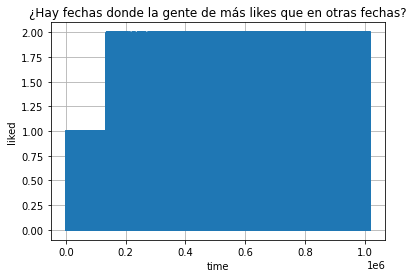

In [7]:
y=data["liked"]
plt.plot(y)
plt.ylabel('liked')
plt.xlabel('time')
plt.title('¿Hay fechas donde la gente de más likes que en otras fechas?')
plt.grid()
plt.show()


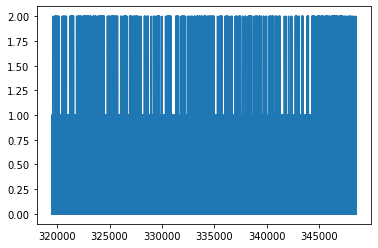

los datos son entre 2020-08-03 18:44:53  a  2020-09-15 09:17:12


In [9]:
dataindex=319500
dataend=29000
newx=data["liked"][dataindex:dataindex+dataend]
plt.plot(newx,"PINK")
plt.show()
print("los datos son entre",data["timestamp"][dataindex]," a ",data["timestamp"][dataindex+dataend])


podemos ver que cada mes empiezan a subir los likes,cada mes sube la opcion de like de 0 a 1 y de 1 a 2, aproximadamente desde agosto empezaron a ser mas frecuentes los likes, vemos que la popularidad no tiene mucho que ver en estos datos , se ve en muchas graficas que hubo un cambio grande en la plataforma aproximadamente en 2020-05 en el cual aumento el movimento y aumento el rango de valores de los likes

no se puede ver en que fechas dan mas likes, pero podemos ver apartir de que fecha hubo un cambio significativo que mejoro la interaccion con los likes y amuento el flujo de estos

**¿Hay alguna relación entre los likes y las canciones recomendadas?**

---



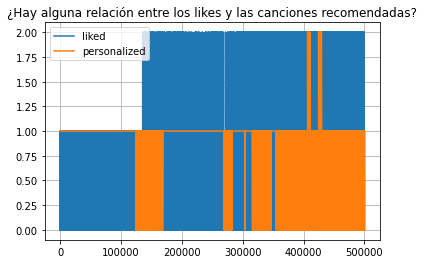

In [13]:
dataindex=500000
x=data["personalized"][0:dataindex]#naranja
y=data["liked"][0:dataindex]#azul
#t=list(range(len(data)))
t=list(range(dataindex))
plt.plot(t,y)
plt.plot(t,x)
plt.legend(['liked', 'personalized'])
plt.title('¿Hay alguna relación entre los likes y las canciones recomendadas?')
plt.grid()
plt.show()

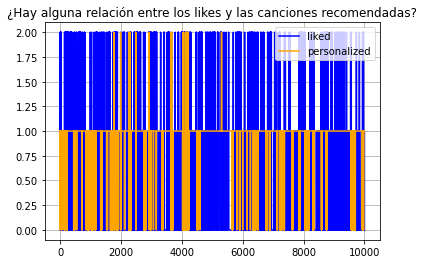

In [ ]:
s=405000
r=s+10000
x=data["personalized"][s:r]#naranja
y=data["liked"][s:r]#azul
#t=list(range(len(data)))
t=list(range(len(y)))
plt.plot(t,y,"blue")
plt.plot(t,x,"orange")
plt.legend(['liked', 'personalized'])
plt.title('¿Hay alguna relación entre los likes y las canciones recomendadas?')
plt.grid()
plt.show()

# **los valores numericos se pueden enteder como:** 

**naranja  ¿fue recomedado?**

0 -> recomedado aleatoriamente

1 ->recomendado

2 -> recomendado por que le gusta el artista

**azul**

0 -> no recibió like

1 -> recibió like por gente que la mayoria de veces, mayor a un 25% de veces da like

2 -> recibió like de alguien que da menor de un 25% veces

podemos ver que no hay una relación dependiente de los likes y un sistema de personalización que se traduce a recomendar canciones en la mayoría de los datos, en la minoría si encontramos una relación cuando hay una recomendación constante bajan los likes , otra cosa que vemos es que cuando el sistema les añade ruido a las recomendaciones hay más likes, conviene que no sean exactas y siempre las mejores recomendaciones  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')